# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [27]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

In [40]:
def loss(X, Y, w):
    '''
    Calculate the log loss.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    loss = -1 * np.mean(np.log(1 / (1 + np.exp(-1 * Y * np.dot(X, w)))))
    return loss

def gradient(x, y, w, l, N):
    '''
    Calculate the gradient of (regularized) logistic error function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        l: lambda regularization term
        N: size of sample
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    gradient = (-1 * y * x) / (1 + np.exp(y * np.dot(x, w))) + (2 * l / N * w)
    return gradient

def SGD(X, Y, w_start, eta, N_epochs, l):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        l: lambda regularization term
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
    '''
    
    N = len(X)
    w = w_start
    for e in range(N_epochs):
      for n in np.random.permutation(N): # random order of points
        w -= eta * gradient(X[n], Y[n], w, l, N)
    return w

In [29]:
# Wine training set 1
wine_data1 = load_data("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training1.txt")
Y1 = wine_data1[:, 0]
X1 = wine_data1[:, 1:]
meanX1 = np.mean(X1, axis = 0) # mean
stdX1 = np.std(X1, axis = 0) # standard deviation
X1 = (X1 - meanX1) / stdX1 # normalization
X1 = np.insert(X1, 0, 1, axis = 1) # bias term

In [30]:
# Wine training set 2
wine_data2 = load_data("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_training2.txt")
Y2 = wine_data2[:, 0]
X2 = wine_data2[:, 1:]
meanX2 = np.mean(X2, axis = 0) # mean 
stdX2 = np.std(X2, axis = 0) # standard deviation
X2 = (X2 - meanX2) / stdX2 # normalization
X2 = np.insert(X2, 0, 1, axis = 1) # bias term

In [31]:
# Wine testing set
wine_test_data = load_data("https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set2/data/wine_validation.txt")
testY = wine_test_data[:, 0]
testX = wine_test_data[:, 1:]
testX1 = (testX - meanX1) / stdX1 # normalization according to X1
testX2 = (testX - meanX2) / stdX2 # normalization according to X2
testX1 = np.insert(testX1, 0, 1, axis = 1) # bias term
testX2 = np.insert(testX2, 0, 1, axis = 1) # bias term

In [46]:
# Implementing ridge regression
lambda_1 = 0.00001
lambdas = [lambda_1 * pow(5,i) for i in range(15)]
N_epochs = 20000
eta = 5e-4

E_in_1 = []
E_in_2 = []
E_out_1 = []
E_out_2 = []
l2_norm_1 = []
l2_norm_2 = []

for l in lambdas:
  w_start = np.random.random(14) * 0.1

  w1 = SGD(X1, Y1, w_start, eta, N_epochs, l)
  E_in_1.append(loss(X1, Y1, w1))
  E_out_1.append(loss(testX1, testY, w1))
  l2_norm_1.append(np.linalg.norm(w1))

for l in lambdas:
  w_start = np.random.random(14) * 0.1 

  w2 = SGD(X2, Y2, w_start, eta, N_epochs, l)
  E_in_2.append(loss(X2, Y2, w2))
  E_out_2.append(loss(testX2, testY, w2))
  l2_norm_2.append(np.linalg.norm(w2))


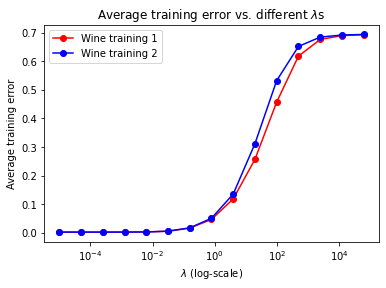

In [47]:
# Average training error vs. different lambdas
plt.figure()
plt.title("Average training error vs. different $\lambda$s")
plt.xscale("log")
plt.xlabel("$\lambda$ (log-scale)")
plt.ylabel("Average training error")
plt.plot(lambdas, E_in_1, "-o", color = "red")
plt.plot(lambdas, E_in_2, "-o", color = "blue")
plt.legend(["Wine training 1", "Wine training 2"], loc = 2)
plt.show()

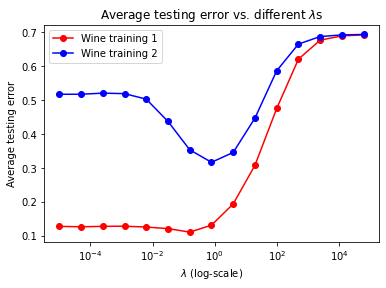

In [48]:
# Average test error vs. different lambdas
plt.figure()
plt.title("Average testing error vs. different $\lambda$s")
plt.xscale("log")
plt.xlabel("$\lambda$ (log-scale)")
plt.ylabel("Average testing error")
plt.plot(lambdas, E_out_1, "-o", color = "red")
plt.plot(lambdas, E_out_2, "-o", color = "blue")
plt.legend(["Wine training 1", "Wine training 2"], loc = 2)
plt.show()

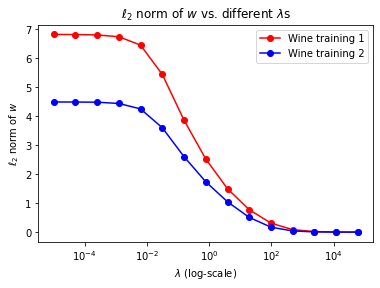

In [49]:
# l2 Norm of w vs. different lambdas
plt.figure()
plt.title("$\ell_2$ norm of $w$ vs. different $\lambda$s")
plt.xscale("log")
plt.xlabel("$\lambda$ (log-scale)")
plt.ylabel("$\ell_2$ norm of $w$")
plt.plot(lambdas, l2_norm_1, "-o", color = "red")
plt.plot(lambdas, l2_norm_2, "-o", color = "blue")
plt.legend(["Wine training 1", "Wine training 2"], loc = 1)
plt.show()